In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("./data/synthetic_fraud_data.csv")

KeyboardInterrupt: 

Min timestamp: 2024-09-30 00:00:01.034820+00:00
Max timestamp: 2024-10-04 04:07:08.273115+00:00
Time span: 4 days 04:07:07.238295


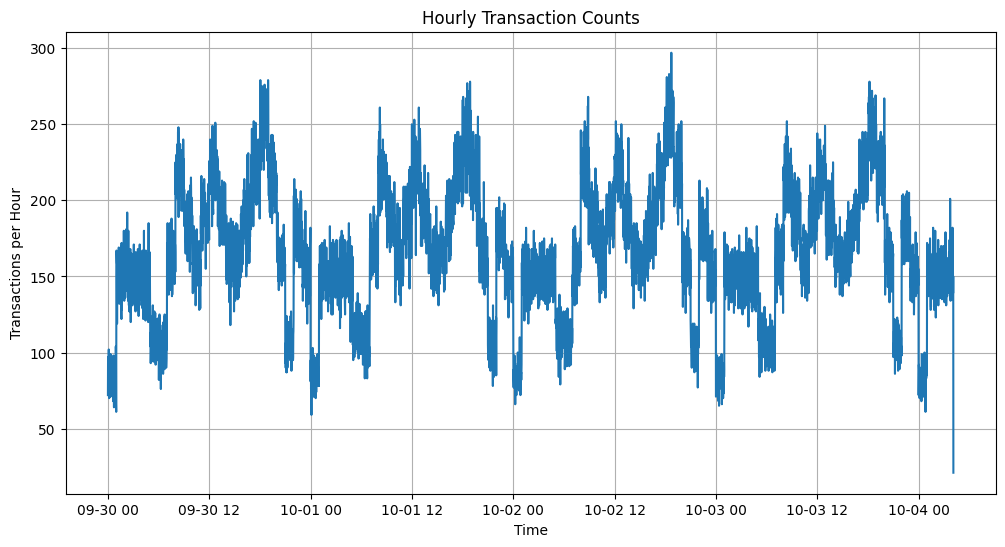

In [101]:
# 2. Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True, format="mixed")

# 3. Set timestamp as index
df = df.set_index("timestamp")

print("Min timestamp:", df.index.min())
print("Max timestamp:", df.index.max())
print("Time span:", df.index.max() - df.index.min())

# 4. Resample to hourly frequency, count transactions
df_hourly_counts = df.resample("min").size()

# 5. Plot hourly transaction counts
plt.figure(figsize=(12, 6))
plt.plot(df_hourly_counts.index, df_hourly_counts.to_numpy(), linewidth=1.5)
plt.title("Hourly Transaction Counts")
plt.xlabel("Time")
plt.ylabel("Transactions per Hour")
plt.grid(True)
plt.show()
